In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

import statsmodels.formula.api as smf
import seaborn as sns
sns.set()

In [3]:
dataset = pd.read_csv("/Users/sunandasharma/ITU/Trimester-4/ITU Capstone/heart-2.csv")
dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# printing the total number of peoples without heart disease and with heart disease

dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
# Our features are 'age to thal'  and the label is 'target'

features = dataset.iloc[:, 0:13]
label = dataset['target']

In [6]:
#independent variables

features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [9]:
#Dependent variable

label

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [10]:
label.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
label.unique()

array([1, 0])

In [12]:
corr = dataset.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

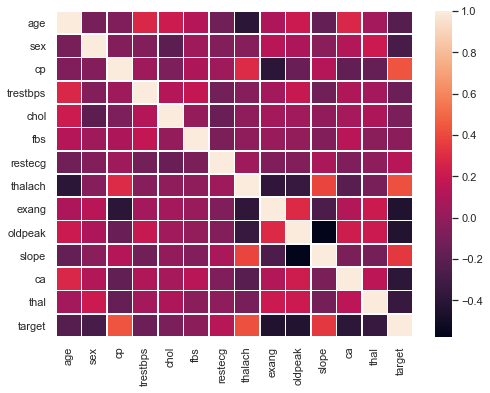

In [12]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, linewidths= .75)

In [13]:
# Checking the co-relations between target and other features/columns:

print(corr["target"].abs().sort_values(ascending=False))

 

# most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


/Users/sunandasharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

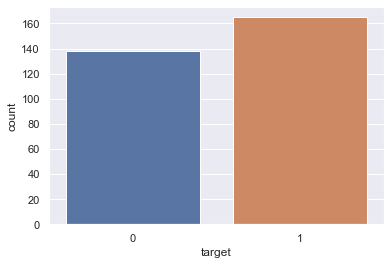

In [15]:
    
sns.countplot(dataset["target"])

/Users/sunandasharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


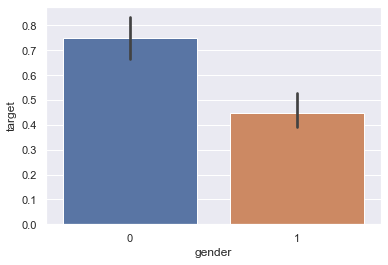

In [16]:
_ = sns.barplot(dataset["sex"], dataset["target"]) 
_ = plt.xlabel("gender")
_ = plt.ylabel("target")
plt.show()

# We notice, that females are more likely to have heart problems than male

In [17]:
# analysing 'cp' column

dataset["cp"].unique()

array([3, 2, 1, 0])

/Users/sunandasharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


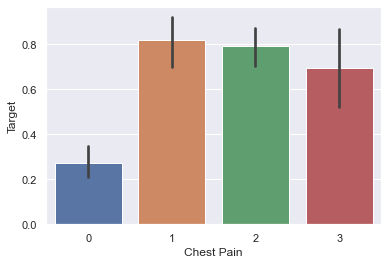

In [18]:
_ = sns.barplot(dataset["cp"], dataset["target"])
_ = plt.xlabel("Chest Pain")
_ = plt.ylabel("Target")
plt.show()

# We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

In [19]:
dataset["fbs"].unique()

array([1, 0])

/Users/sunandasharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


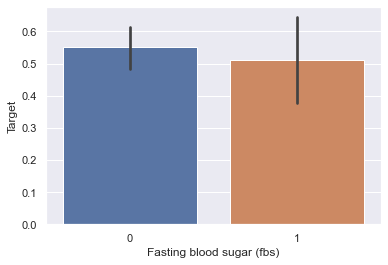

In [20]:
_= sns.barplot(dataset["fbs"], dataset['target'])
_= plt.xlabel("Fasting blood sugar (fbs)")
_= plt.ylabel("Target")
plt.show()

In [21]:
dataset["restecg"].unique()

array([0, 1, 2])

/Users/sunandasharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


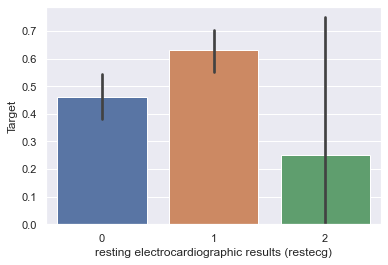

In [22]:
sns.barplot(dataset["restecg"], dataset['target'])
_= plt.xlabel("resting electrocardiographic results (restecg)")
_= plt.ylabel("Target")
plt.show()

# people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

In [23]:
dataset["exang"].unique()

array([0, 1])

/Users/sunandasharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


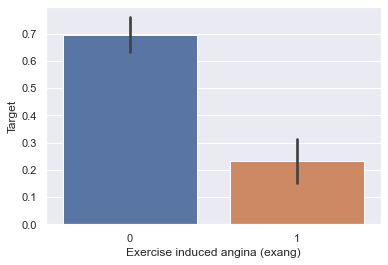

In [24]:
sns.barplot(dataset["exang"], dataset['target'])
_= plt.xlabel("Exercise induced angina (exang)")
_= plt.ylabel("Target")
plt.show()

# People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

In [25]:
dataset["slope"].unique()

array([0, 2, 1])

/Users/sunandasharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='slope', ylabel='target'>

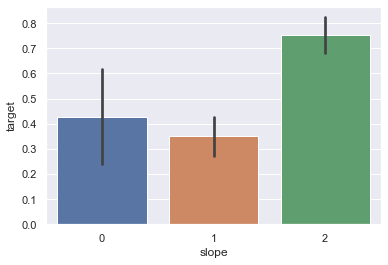

In [26]:
sns.barplot(dataset["slope"], dataset['target'])

# We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

In [27]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

/Users/sunandasharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


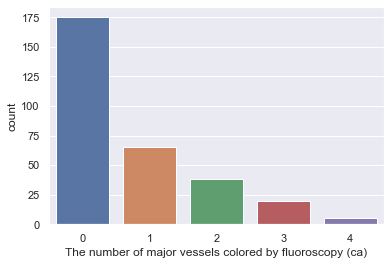

In [28]:
sns.countplot(dataset['ca'])
_= plt.xlabel("The number of major vessels colored by fluoroscopy (ca)")
_= plt.ylabel("count")
plt.show()

/Users/sunandasharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


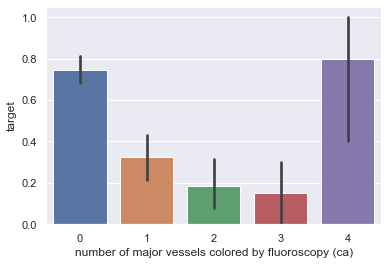

In [29]:
sns.barplot(dataset["ca"], dataset['target'])
_= plt.xlabel("number of major vessels colored by fluoroscopy (ca)")
_= plt.ylabel("target")
plt.show()

# ca=4 has astonishingly large number of heart patients

In [30]:
dataset["thal"].unique()

array([1, 2, 3, 0])

/Users/sunandasharma/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


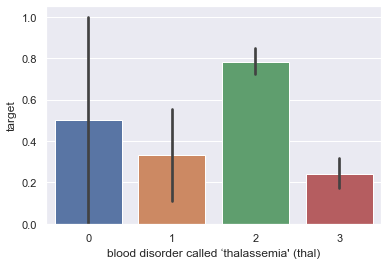

In [31]:
sns.barplot(dataset["thal"], dataset['target'])
_= plt.xlabel("blood disorder called ‘thalassemia' (thal)")
_= plt.ylabel("target")
plt.show()


In [33]:
#we need to shuffle the data then we need split the dataset as training data and testing data

from sklearn.model_selection import train_test_split

In [34]:
#random state is a calculated randomness

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [35]:
from sklearn.metrics import accuracy_score

In [36]:

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
    
rand_classifier = ensemble.RandomForestClassifier()

max_accuracy = 0


for x in range(100):
    
    rand_classifier = RandomForestClassifier(random_state= x)
    rand_classifier.fit(X_train,y_train)
    y_pred_rand_classifier = rand_classifier.predict(X_test)
    
    current_accuracy = round(accuracy_score(y_pred_rand_classifier,y_test)*100,2)
    
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        
        best_x = x # best random state for our model 
        
print("Maximum accuracy achieved : ", max_accuracy)
print(" Best Random state for our model is : ", best_x)

rand_classifier = RandomForestClassifier(random_state = best_x)
rand_classifier.fit(X_train,y_train)
y_pred_rand_classifier = rand_classifier.predict(X_test)



Maximum accuracy achieved :  96.77
 Best Random state for our model is :  88


In [37]:
y_pred_rand_classifier.shape

(31,)

In [38]:
score_random_forest = round(accuracy_score(y_pred_rand_classifier,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: " + str(score_random_forest)+ " %")

The accuracy score achieved using Random Forest is: 96.77 %


In [39]:

patient1 = rand_classifier.predict([[36, 0, 1, 135, 208, 0, 0, 171, 0, 1.5, 2, 0, 2]])
patient1

array([1])

In [40]:
patient2 = rand_classifier.predict([[22, 1, 0, 98, 130, 1, 1, 111, 1, 0.5, 1, 1, 1]])
patient2

array([0])

In [ ]:
# pickeling the model:


In [41]:
import pickle

In [42]:
with open('model_pickle', 'wb') as f:
    pickle.dump(rand_classifier, f)

In [43]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [44]:
patient1= mp.predict([[39, 0, 1, 135, 208, 0, 0, 171, 0, 1.5, 2, 0,2]])
print(patient1[0])

1


In [45]:
patient2= mp.predict([[50, 0, 0, 100, 300, 1, 1, 200, 1, 7, 2, 4,2]])
print(patient2[0])

0
